# Our First Machine Learning Model

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
df = pd.read_csv('C:\\Users\\DELL-IN\\Downloads\\Housing.csv')  # Make sure this file exists

# Features and target
X = df[['area', 'bedrooms', 'bathrooms','stories']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Coefficients: [3.49009738e+02 1.74685138e+05 1.25815095e+06 4.83859660e+05]
Intercept: -64342.4209056776
Mean Squared Error: 2457741642022.0864
R² Score: 0.5137585349037072


# Objective:# Understand the Dataset & cleanup (if required).
# 
Build Regression models to predict the sales w.r.t a single & multiple featur
e#
Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

# Stractegic Plan of Action:
# We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:
# Data Exploration
# Exploratory Data Analysis (EDA)
# 
Data Pre-processi g# 
Data Manipulati# o# n
Feature Selection/Extract# i# on
Predictive Model# l# ing
Project Outcomes & Conclusion

In [6]:
#Importing Relevant libraries
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [7]:
# Load your data
df = pd.read_csv('C:\\Users\\DELL-IN\\Downloads\\Housing.csv')  # Make sure this file exists
df1 = df[['price','area','bedrooms','stories','parking']]
print (df1)

        price  area  bedrooms  stories  parking
0    13300000  7420         4        3        2
1    12250000  8960         4        4        3
2    12250000  9960         3        2        2
3    12215000  7500         4        2        3
4    11410000  7420         4        2        2
..        ...   ...       ...      ...      ...
540   1820000  3000         2        1        2
541   1767150  2400         3        1        0
542   1750000  3620         2        1        0
543   1750000  2910         3        1        0
544   1750000  3850         3        2        0

[545 rows x 5 columns]


# Data Exploration

In [8]:
df1.head(10)

,price,area,bedrooms,stories,parking
0,13300000,7420,4,3,2
1,12250000,8960,4,4,3
2,12250000,9960,3,2,2
3,12215000,7500,4,2,3
4,11410000,7420,4,2,2
5,10850000,7500,3,1,2
6,10150000,8580,4,4,2
7,10150000,16200,5,2,0
8,9870000,8100,4,2,2
9,9800000,5750,3,4,1


In [9]:
#Checking the dtypes of all the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     545 non-null    int64
 1   area      545 non-null    int64
 2   bedrooms  545 non-null    int64
 3   stories   545 non-null    int64
 4   parking   545 non-null    int64
dtypes: int64(5)
memory usage: 21.4 KB


In [10]:
df1.describe()

,price,area,bedrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,3.000000


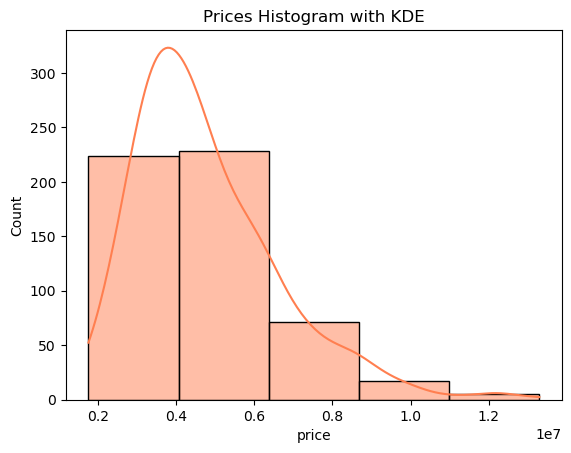

In [11]:
#Let us first analyze the distribution of the target variable

import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['price'], kde=True, bins=5, color='coral')
plt.title('Prices Histogram with KDE')
plt.show()

In [12]:
# Check for null values in the entire DataFrame
print("Null values in each column:")
print(df1.isnull().sum())

Null values in each column:
price       0
area        0
bedrooms    0
stories     0
parking     0
dtype: int64


In [13]:
# Find duplicate rows
duplicates = df1[df1.duplicated()]

print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       price  area  bedrooms  stories  parking
55   7350000  6000         3        2        1
185  5110000  3000         3        2        0
367  3675000  3630         2        1        0


In [14]:
df1.describe()

,price,area,bedrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,3.000000


# Exploratory Data Analysis

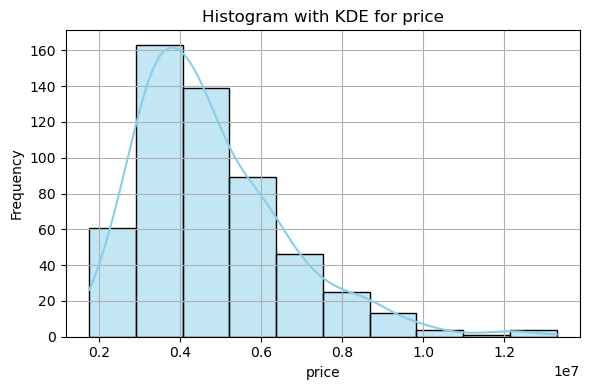

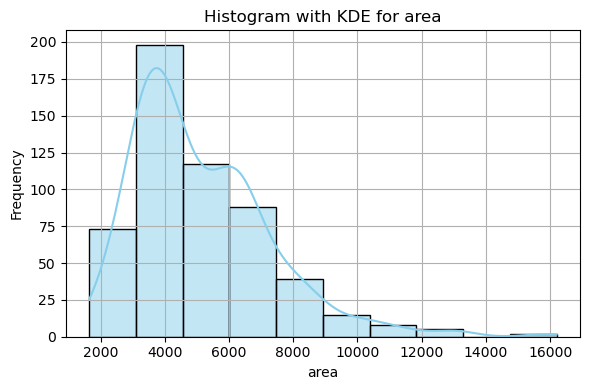

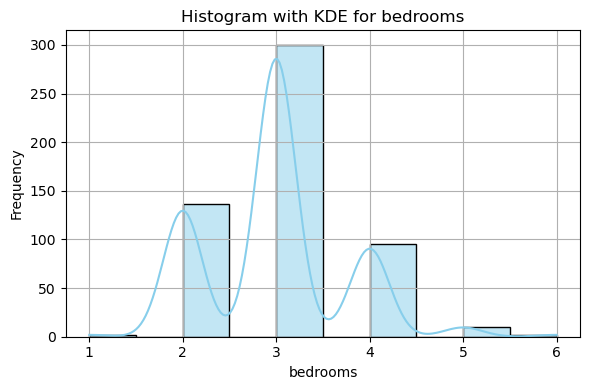

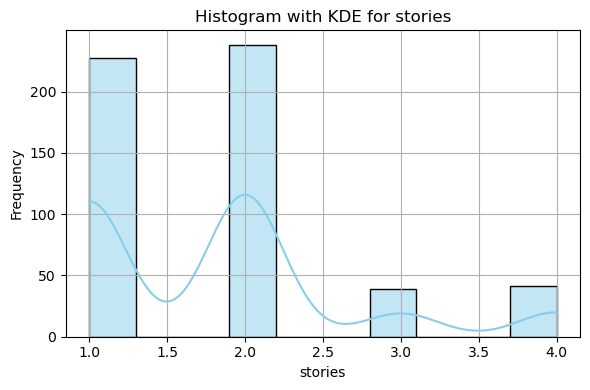

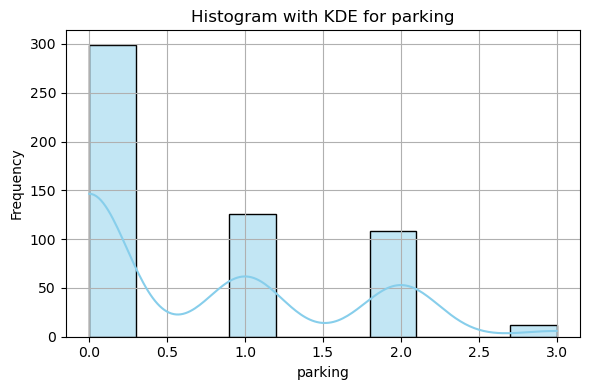

In [15]:
# Select only numeric columns
numeric_cols = df1.select_dtypes(include='number')

# Plot individual histograms with KDE
for col in numeric_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

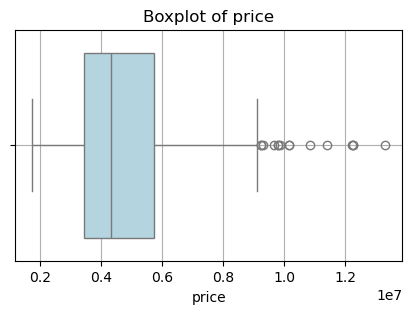

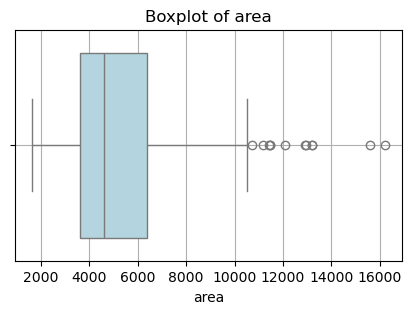

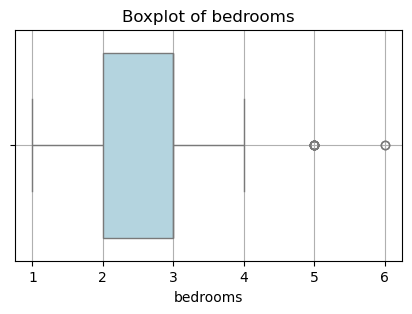

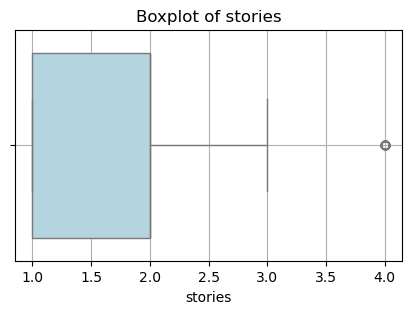

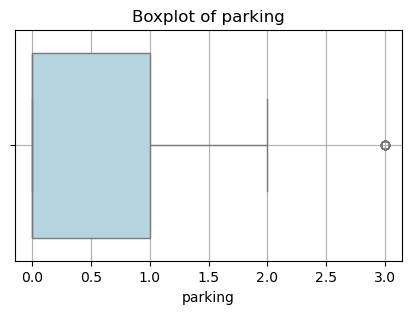

In [16]:
# Plot boxplots for all numeric columns
numeric_cols = df1.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

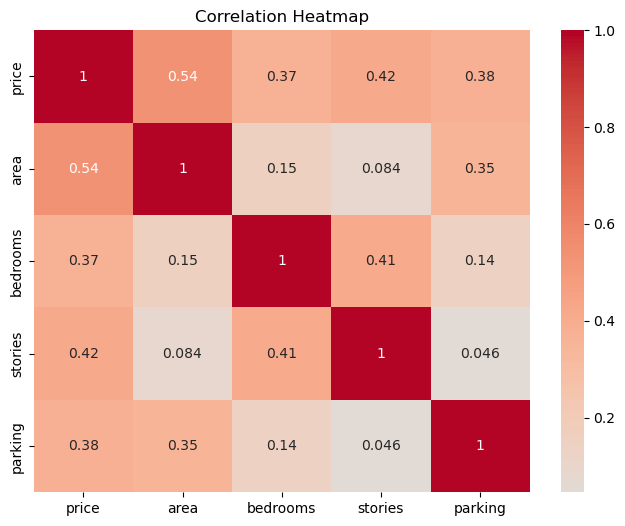

In [17]:
# Correlation matrix calculation
correlation_matrix = df1.corr()

# Heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Data Pre-processing

In [18]:
# Function to remove outliers from all numeric columns
def remove_outliers_iqr(df1):
    # Select only numeric columns
    numeric_cols = df1.select_dtypes(include='number').columns
    # Start with all True mask
    mask = pd.Series(True, index=df.index)

    for col in numeric_cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Update mask
        mask &= df[col].between(lower_bound, upper_bound)

    # Return filtered DataFrame without outliers
    return df1[mask]

# Remove outliers
df_cleaned = remove_outliers_iqr(df1)

# Output
print("Original DataFrame:")
print(df1)

print("\nDataFrame after removing outliers:")
print(df_cleaned)

Original DataFrame:
        price  area  bedrooms  stories  parking
0    13300000  7420         4        3        2
1    12250000  8960         4        4        3
2    12250000  9960         3        2        2
3    12215000  7500         4        2        3
4    11410000  7420         4        2        2
..        ...   ...       ...      ...      ...
540   1820000  3000         2        1        2
541   1767150  2400         3        1        0
542   1750000  3620         2        1        0
543   1750000  2910         3        1        0
544   1750000  3850         3        2        0

[545 rows x 5 columns]

DataFrame after removing outliers:
       price  area  bedrooms  stories  parking
15   9100000  6000         4        2        2
16   9100000  6600         4        2        1
18   8890000  4600         3        2        2
19   8855000  6420         3        2        1
20   8750000  4320         3        2        2
..       ...   ...       ...      ...      ...
540  1820000  3

# Data manipulation

In [19]:
# Features and target
X = df1[['area', 'bedrooms', 'parking','stories']]
y = df1['price']

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Model Building
categorical_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]


In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

# ========================
# 1. LOAD & CLEAN DATA
# ========================

df = pd.read_csv("C:\\Users\\DELL-IN\\Downloads\\Housing.csv")

# Clean up any unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print("\n🔍 Missing Values Check:")
print(df.isnull().sum())

# Drop rows where target variable is missing
df = df.dropna(subset=['price'])

# ========================
# 2. HANDLE CATEGORICALS
# ========================

# Identify categorical and numeric columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns.drop('price')

# Create column transformer with proper error handling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'  # Explicitly drop any extra columns
)

# ========================
# 3. MODEL PIPELINE
# ========================

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Prepare data
X = df.drop('price', axis=1)
y = df['price']
y_log = np.log1p(y)

# ========================
# 4. TRAIN MODEL
# ========================

full_pipeline.fit(X, y_log)

# ========================
# 5. EVALUATION
# ========================

y_pred_log = full_pipeline.predict(X)
y_pred = np.expm1(y_pred_log)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("\n📊 Evaluation:")
print(f"R²       : {r2:.4f}")
print(f"MAE      : {mae:,.2f}")
print(f"MSE      : {mse:,.2f}")
print(f"RMSE     : {rmse:,.2f}")

# ========================
# 6. SAVE MODEL
# ========================

with open("housing_model.pkl", "wb") as f:
    pickle.dump(full_pipeline, f)

# ========================
# 7. PREDICTION FUNCTION
# ========================

def predict_new_data(new_data):
    # Load model
    with open("housing_model.pkl", "rb") as f:
        pipeline = pickle.load(f)
    
    # Ensure same columns as training data
    new_data = new_data[X.columns]
    
    # Predict
    pred_log = pipeline.predict(new_data)
    return np.expm1(pred_log)


🔍 Missing Values Check:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

📊 Evaluation:
R²       : 0.7479
MAE      : 682,608.91
MSE      : 880,315,496,723.83
RMSE     : 938,251.30


# Our ML Model Performance is not good
# Let's add more variable

In [23]:
# Load your data
import pandas as pd
df = pd.read_csv('C:\\Users\\DELL-IN\\Downloads\\Housing.csv')  # Make sure this file exists


In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,NaN,NaN,NaN,NaN
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,NaN,NaN,NaN,NaN
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,NaN,NaN,NaN,NaN
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,NaN,NaN,NaN,NaN
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,NaN,NaN,NaN,NaN


In [25]:
# One hot encoding
# Example: Convert all categorical (object) columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [26]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,NaN,NaN,NaN,NaN,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,NaN,NaN,NaN,NaN,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,NaN,NaN,NaN,NaN,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,NaN,NaN,NaN,NaN,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,NaN,NaN,NaN,NaN,True,True,True,False,True,False,False,False


In [27]:
print(df_encoded.dtypes)

price                                int64
area                                 int64
bedrooms                             int64
bathrooms                            int64
stories                              int64
parking                              int64
Unnamed: 13                        float64
Unnamed: 14                        float64
Unnamed: 15                        float64
Unnamed: 16                        float64
mainroad_yes                          bool
guestroom_yes                         bool
basement_yes                          bool
hotwaterheating_yes                   bool
airconditioning_yes                   bool
prefarea_yes                          bool
furnishingstatus_semi-furnished       bool
furnishingstatus_unfurnished          bool
dtype: object


In [28]:
# Features and target
# Drop the target variable to get features only
X = df_encoded.drop(columns=['price'])

# Optional: keep target separately
y = df_encoded['price']

# Convert boolean columns to integers
X = X.astype({col: 'int' for col in X.select_dtypes(include='bool').columns})

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("Housing.csv")

# Define numeric and categorical features
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]

# Separate target
y = df['price']

# One-hot encode categorical columns (drop_first to avoid dummy trap)
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Normalize numeric features
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Final feature set
X = pd.concat([df_numeric_scaled, df_encoded], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Ensure data types are numeric
X_train_const = X_train_const.astype(float)
X_test_const = X_test_const.astype(float)

# Fit model
model = sm.OLS(y_train, X_train_const).fit()

# Print summary
print("Model Summary (Training Data):")
print(model.summary())

# Predict on test set
y_pred = model.predict(X_test_const)

# Evaluate model
r2 = r2_score(y_test, y_pred)
print(f"\nR² on Test Data: {r2 * 100:.2f}%")


Model Summary (Training Data):
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           2.16e-97
Time:                        11:49:43   Log-Likelihood:                -6635.2
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     422   BIC:                         1.336e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

# Let's deploy this model using streamlit

In [31]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression

# Load the uploaded dataset
df = pd.read_csv('C:\\Users\\DELL-IN\\Downloads\\Housing.csv')

# Check column names (optional debug)
print("Columns:", df.columns)

# Use only 's' as feature and 'price' as target
X = df[['bedrooms']]  # Feature should be in double brackets to keep it 2D
y = df['price']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Save model to a file
with open('C:\\Users\\DELL-IN\\Downloads\\housing_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as Housing'.pkl'")

Columns: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')
✅ Model trained and saved as Housing'.pkl'


In [32]:
# Save model to file using pickle
import pickle
with open('C:\\Users\\DELL-IN\\Downloads\\housing_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [33]:
# Run this in Python Terminal

In [34]:
# streamlit run app.py